# **Covid Image Classification Project**

## **Background and Context**

Covid-19 is a fast-growing disease that affects human health severely. Patients diagnosed with this condition suffer from lung infections. The medical community has recently released vaccines that have a slower effect in increasing immunity. This virus has impacted various countries\' human health and financial standards.

Deep learning algorithms have recently used image classification to identify medical images. Convolutional Neural Networks (CNN) can be widely utilized to identify COVID-19 to assist radiologists in medical analysis by classifying patients who are healthy, have viral pneumonia, or are affected by COVID using X-ray pictures of the lungs.

## **Objective**

The aim of this project is two folds:

 - Build a deep learning model  to differentiate an X-ray image of a normal person from an unhealthy one.
 - Build an app using Streamlit for users to make predictions or inference using your model.


## **Data Dictionary**

- This dataset contains training set images of 3 classes which are converted into numpy arrays.
- The dataset comprises 3 classes:
 - COVID-19: The patient who is affected due to covid.
 - Viral Pneumonia: This is a viral fever that has similar characteristics to Covid but is not covid.
 - Normal- A healthy Person.
- The data file names are:
 - [CovidImages.npy](https://colab.research.google.com/drive/1w4VqoQkdLDdc8OzfSfYs-rHdhxv0i6Eq#scrollTo=NP_OVMaFE5yD&line=25&uniqifier=1)
 - [CovidLabels.csv](https://drive.google.com/file/d/1XN2hhTvflxHS5efPI4OmMjl9gIcO8--5/view?usp=sharing)
- Due to the large volume of data, the images were converted to the CovidImages.npy file and the labels are also put into CovidLabels.csv so that you can work on the data/project seamlessly without having to worry about the high data volume.

In [1]:
import os
import numpy as np                                                                               # Importing numpy for Matrix Operations
import pandas as pd                                                                              # Importing pandas to read CSV files
import matplotlib.pyplot as plt                                                                  # Importting matplotlib for Plotting and visualizing images
import math                                                                                      # Importing math module to perform mathematical operations
import cv2                                                                                       # Importing openCV for image processing
import seaborn as sns                                                                            # Importing seaborn to plot graphs


# Tensorflow modules
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator                              # Importing the ImageDataGenerator for data augmentation
from tensorflow.keras.models import Sequential, Model                                            # Importing the sequential module to define a sequential model
from tensorflow.keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D,BatchNormalization # Defining all the layers to build our CNN Model
from tensorflow.keras.optimizers import Adam,SGD
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping                            # Importing the optimizers which can be used in our model
from sklearn import preprocessing                                                                # Importing the preprocessing module to preprocess the data
from sklearn.model_selection import train_test_split                                             # Importing train_test_split function to split the data into train and test
from sklearn.metrics import confusion_matrix, classification_report                              # Importing confusion_matrix to plot the confusion matrix

# Display images using OpenCV
from google.colab.patches import cv2_imshow                                                      # Importing cv2_imshow from google.patches to display images

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

## **Reading the dataset**

In [2]:
# Mount Google drive to access the dataset (CovidImages)
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Load the image file of dataset
images = np.load('/content/drive/MyDrive/Files/Data/MLOps_practice/Data/train/CovidImages.npy')

# Load the labels file of dataset
labels = pd.read_csv('/content/drive/MyDrive/Files/Data/MLOps_practice/Data/train/CovidLabels.csv')

## **Overview of the dataset**


Let's print the shape of the images and labels

In [4]:
print(images.shape)
print(labels.shape)

(251, 128, 128, 3)
(251, 1)


<b>Converting the BGR images to RGB images.

In [5]:
# Converting the images from BGR to RGB using cvtColor function of OpenCV
for i in range(len(images)):
  images[i] = cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB)

In [6]:
np.unique(labels)

array(['Covid', 'Normal', 'Viral Pneumonia'], dtype=object)

## **Exploratory Data Analysis**

In [7]:
def plot_images(images,labels):
  # num_classes=10                                                                  # Number of Classes
  # categories=np.unique(labels)
  keys=dict(labels['Label'])                                                      # Obtaing the unique classes from y_train
  rows = 3                                                                        # Defining number of rows=3
  cols = 4                                                                        # Defining number of columns=4
  fig = plt.figure(figsize=(10, 8))                                               # Defining the figure size to 10x8
  for i in range(cols):
      for j in range(rows):
          random_index = np.random.randint(0, len(labels))                        # Generating random indices from the data and plotting the images
          ax = fig.add_subplot(rows, cols, i * rows + j + 1)                      # Adding subplots with 3 rows and 4 columns
          ax.imshow(images[random_index, :])                                      # Plotting the image
          ax.set_title(keys[random_index])
          plt.tight_layout()
  plt.show()

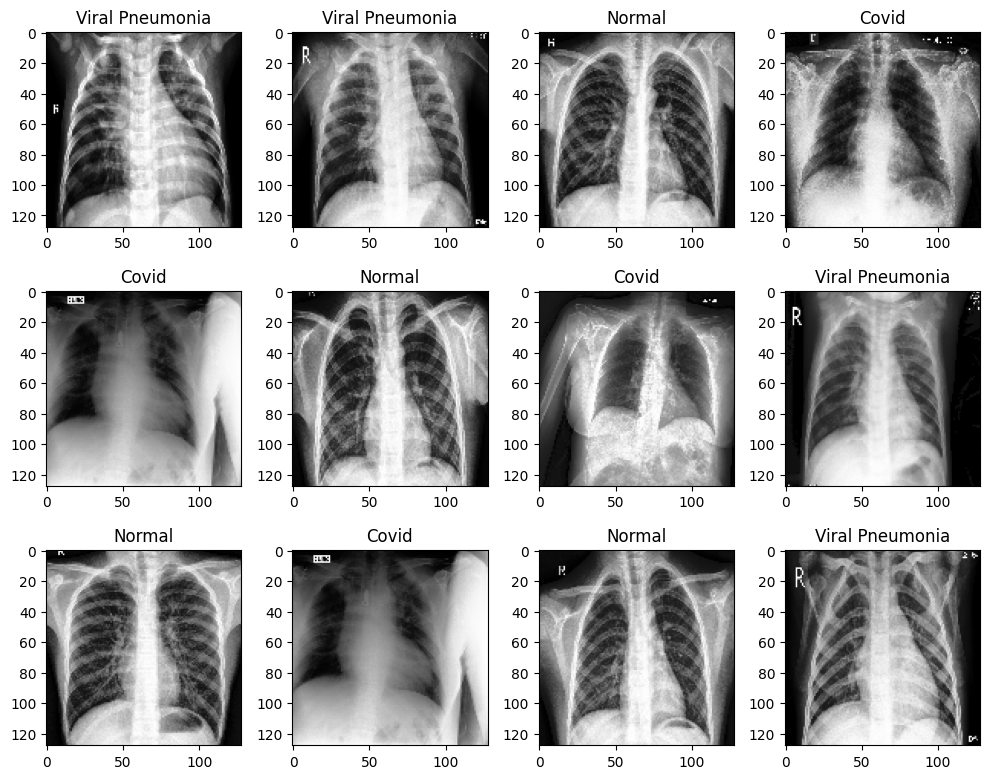

In [8]:
plot_images(images,labels)

<b> Checking for data imbalance

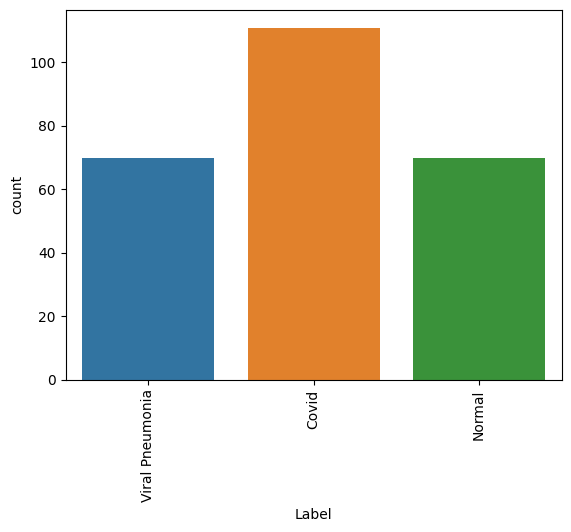

In [9]:
sns.countplot(data = labels, x = "Label")
plt.xticks(rotation=90);

- As you can observe from the above plot, the dataset is balanced.

## **Splitting the dataset**

In [10]:
from sklearn.model_selection import train_test_split
X_temp, X_test, y_temp, y_test = train_test_split(np.array(images),labels , test_size=0.1, random_state=42,stratify=labels)
X_train, X_val, y_train, y_val = train_test_split(X_temp,y_temp , test_size=0.1, random_state=42,stratify=y_temp)

In [11]:
print(X_train.shape,y_train.shape)
print(X_val.shape,y_val.shape)
print(X_test.shape,y_test.shape)

(202, 128, 128, 3) (202, 1)
(23, 128, 128, 3) (23, 1)
(26, 128, 128, 3) (26, 1)


## **Making the data compatible:**

- Convert labels from names to one hot vectors
- Normalizing the values

## Encoding the target labels

In [12]:
# Convert labels from names to one hot vectors.
# We have already used encoding methods like onehotencoder and labelencoder earlier so now we will be using a new encoding method called labelBinarizer.
# Labelbinarizer works similar to onehotencoder

from sklearn.preprocessing import LabelBinarizer, LabelEncoder
enc = LabelEncoder()
y_train = enc.fit_transform(y_train)
y_val = enc.transform(y_val)
y_test = enc.transform(y_test)

In [13]:
y_train

array([1, 0, 2, 0, 1, 1, 2, 2, 2, 2, 2, 0, 2, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       2, 0, 1, 2, 2, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 2, 0, 1, 1, 2, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 1, 0, 0,
       2, 2, 2, 0, 2, 0, 1, 2, 1, 0, 0, 0, 2, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 2, 0, 1, 1, 0, 2, 0, 0, 2, 2, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 2, 0, 1, 1, 1, 0, 0, 2, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 2, 0, 0, 0, 2, 2, 1, 2, 2, 2, 2, 0, 2, 2, 0, 1, 2, 1, 0,
       2, 2, 1, 2, 2, 2, 0, 2, 0, 1, 0, 2, 0, 1, 0, 1, 2, 2, 0, 1, 0, 2,
       2, 0, 1, 1, 0, 0, 1, 2, 2, 0, 1, 2, 2, 1, 2, 2, 2, 2, 0, 1, 0, 2,
       1, 1, 1, 1])

In [14]:
from tensorflow.keras.utils import to_categorical

In [15]:
y_train_enc = to_categorical(y_train)
y_val_enc = to_categorical(y_val)
y_test_enc = to_categorical(y_test)

In [16]:
y_train_enc.shape, y_val_enc.shape, y_test_enc.shape

((202, 3), (23, 3), (26, 3))

## Data Normalization
Since the **image pixel values range from 0-255**, our method of normalization here will be **scaling** - we shall **divide all the pixel values by 255 to standardize the images to have values between 0-1.**

In [17]:
# Normalizing the image pixels
X_train_normalized = X_train.astype('float32')/255.0
X_val_normalized = X_val.astype('float32')/255.0
X_test_normalized = X_test.astype('float32')/255.0

## **Model Building - Convolutional Neural Network (CNN)**
Let's create a CNN model sequentially, where we will be adding the layers one after another.

First, we need to clear the previous model's history from the session even if a single model can run multiple times on the same data.

In Keras, we need a special command to clear the model's history, otherwise the previous model history remains in the backend.

Also, let's fix the seed again after clearing the backend.

Let's **set the seed for random number generators in Numpy, the Random library in Python, and in TensorFlow** to be able to reproduce the same results every time we run the code.

Now, let's build a **CNN Model** with the following 2 main parts - <br>

1. **The Feature Extraction layers** which are comprised of convolutional and pooling layers.
2. **The Fully Connected classification layers** for prediction.<br><br>

## **Data Augmentation**

In most of the real-world case studies, it is challenging to acquire a large number of images and then train CNNs. To overcome this problem, one approach we might consider is **Data Augmentation**. CNNs have the property of **translational invariance**, which means they can recognise an object even if its appearance shifts translationally in some way. <br> Taking this attribute into account, we can augment the images using the techniques listed below - <br>
**1. Horizontal Flip** (should be set to True/False) <br>
**2. Vertical Flip** (should be set to True/False) <br>
**3. Height Shift** (should be between 0 and 1) <br>
**4. Width Shift** (should be between 0 and 1) <br>
**5. Rotation** (should be between 0 and 180) <br>
**6. Shear** (should be between 0 and 1) <br>
**7. Zoom** (should be between 0 and 1) etc. <br>

Remember, **data augmentation should not be used in the validation/test data set**.

In [18]:
# Clearing backend
from tensorflow.keras import backend
backend.clear_session()

# Fixing the seed for random number generators
import random
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

In [19]:
# All images to be rescaled by 1/255.
train_datagen = ImageDataGenerator(
                              rotation_range=20,
                              fill_mode='nearest',
                              horizontal_flip = True,
                              vertical_flip = True,
                              shear_range = 0.1,
                              zoom_range = 0.1
                              )
#test_datagen  = ImageDataGenerator(rescale = 1.0/255.) You don't augument test data

In [20]:
# Intializing a sequential model
model = Sequential()

# Adding first conv layer with 128 filters and kernel size 3x3 , padding 'same' provides the output size same as the input size
# Input_shape denotes input image dimension images
model.add(Conv2D(32, (3, 3), activation='relu', padding="same", input_shape=(128, 128, 3)))

# Adding max pooling to reduce the size of output of first conv layer
model.add(MaxPooling2D((2, 2), padding = 'same'))
# model.add(BatchNormalization())

model.add(Conv2D(64, (3, 3), activation='relu', padding="same"))
model.add(MaxPooling2D((2, 2), padding = 'same'))
#model.add(BatchNormalization())

model.add(Conv2D(64, (3, 3), activation='relu', padding="same"))
model.add(MaxPooling2D((2, 2), padding = 'same'))
#model.add(BatchNormalization())

# flattening the output of the conv layer after max pooling to make it ready for creating dense connections
model.add(Flatten())

# Adding a fully connected dense layer with 100 neurons
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

# Adding the output layer with 10 neurons and activation functions as softmax since this is a multi-class classification problem
model.add(Dense(3, activation='softmax'))

# Using SGD Optimizer
# opt = SGD(learning_rate=0.01, momentum=0.9)
opt=Adam()
# Compile model
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Generating the summary of the model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 64, 64, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 32, 32, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 16, 16, 64)        0

In [21]:
model_filepath = "/content/drive/MyDrive/Files/Data/MLOps_practice/Models/image_model01.h5"
chkpt = ModelCheckpoint(model_filepath, verbose = 1, save_best_only=True)
es = EarlyStopping(patience=3, verbose = 1)

### <b> Fitting the model on the train data

In [22]:
# Epochs
epochs = 40
# Batch size
batch_size = 64

#model.fit(train_datagen.flow(X_train_normalized, y_train_enc))

history = model.fit(
              train_datagen.flow(X_train_normalized, y_train_enc, batch_size=batch_size, seed=42, shuffle=False),
                    epochs=epochs, steps_per_epoch=X_train_normalized.shape[0] // batch_size,
                    validation_data=(X_val_normalized, y_val_enc),
                    verbose=1,  callbacks = [es, chkpt])

Epoch 1/40
2/3 [===================>..........] - ETA: 1s - loss: 1.1908 - accuracy: 0.3108 
Epoch 1: val_loss improved from inf to 1.08081, saving model to /content/drive/MyDrive/Files/Data/MLOps_practice/Models/image_model01.h5
3/3 [==============================] - 14s 1s/step - loss: 1.1706 - accuracy: 0.2826 - val_loss: 1.0808 - val_accuracy: 0.6522
Epoch 2/40
3/3 [==============================] - ETA: 0s - loss: 1.0970 - accuracy: 0.3913
Epoch 2: val_loss did not improve from 1.08081
3/3 [==============================] - 1s 366ms/step - loss: 1.0970 - accuracy: 0.3913 - val_loss: 1.0845 - val_accuracy: 0.2609
Epoch 3/40
3/3 [==============================] - ETA: 0s - loss: 1.0877 - accuracy: 0.4062
Epoch 3: val_loss improved from 1.08081 to 1.04565, saving model to /content/drive/MyDrive/Files/Data/MLOps_practice/Models/image_model01.h5
3/3 [==============================] - 2s 584ms/step - loss: 1.0877 - accuracy: 0.4062 - val_loss: 1.0456 - val_accuracy: 0.6957
Epoch 4/40
2/

### **Model Evaluation**

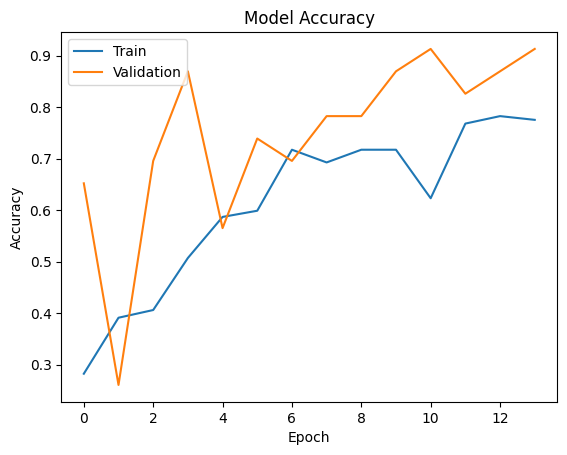

In [23]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [24]:
accuracy = model.evaluate(X_test_normalized, y_test_enc, verbose=2)

1/1 - 0s - loss: 0.3582 - accuracy: 0.8846 - 261ms/epoch - 261ms/step


In [25]:
# Here we would get the output as probablities for each category
y_pred=model.predict(X_test_normalized)

1/1 [==============================] - 0s 119ms/step


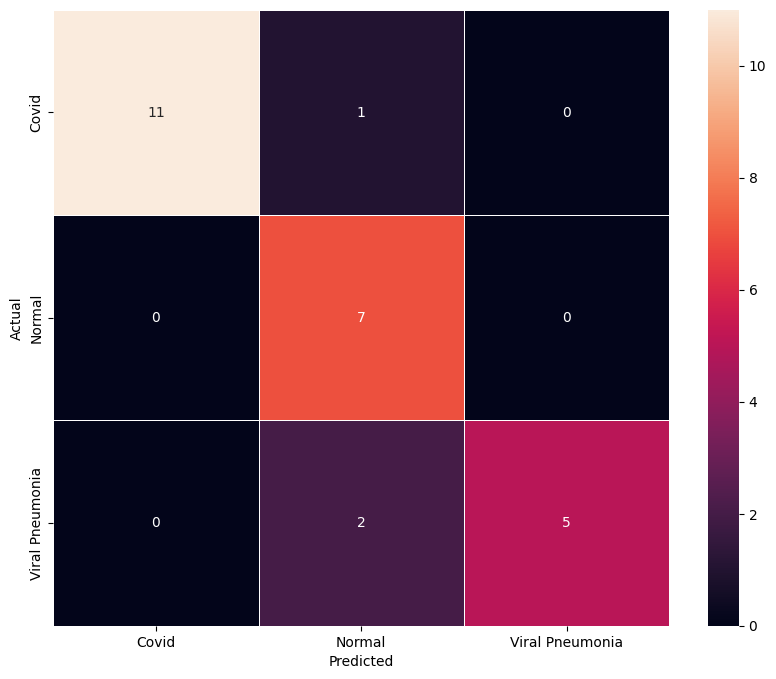

In [26]:
# Obtaining the categorical values from y_test_encoded and y_pred
y_pred_arg=np.argmax(y_pred,axis=1)
y_test_arg=np.argmax(y_test_enc,axis=1)

categories=np.unique(labels)
categories

# Plotting the Confusion Matrix using confusion matrix() function which is also predefined tensorflow module
confusion_matrix = tf.math.confusion_matrix(y_test_arg,y_pred_arg)
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(
    confusion_matrix,
    xticklabels=categories,
    yticklabels=categories,
    annot=True,
    linewidths=.4,
    fmt="d",
    square=True,
    ax=ax
)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [27]:
print(classification_report(y_test_arg,y_pred_arg))

              precision    recall  f1-score   support

           0       1.00      0.92      0.96        12
           1       0.70      1.00      0.82         7
           2       1.00      0.71      0.83         7

    accuracy                           0.88        26
   macro avg       0.90      0.88      0.87        26
weighted avg       0.92      0.88      0.89        26



# Transfer Learning using VGG16

- Let's try again, but this time, we will be using the idea of Transfer Learning. We will be loading a pre-built architecture - VGG16, which was trained on the ImageNet dataset and is the runner-up in the ImageNet competition in 2014.

- For training VGG16, we will directly use the convolutional and pooling layers and freeze their weights i.e. no training will be done on them. For classification, we will replace the existing fully-connected layers with FC layers created specifically for our problem

In [28]:
from tensorflow.keras.models import Model
from keras.applications.vgg16 import VGG16
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

In [29]:
model_filepath = "/content/drive/MyDrive/Files/Data/MLOps_practice/Models/image_model02.h5"
chkpt = ModelCheckpoint(model_filepath, verbose = 1, save_best_only=True)
es = EarlyStopping(patience=3, verbose = 1)

In [30]:
vgg_model = VGG16(weights='imagenet', include_top = False, input_shape = (128,128,3))   # Importing the VGG16 Model with pretrained ImageNet weights
vgg_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 128, 128, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 128, 128, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 64, 64, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 64, 64, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 64, 64, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 32, 32, 128)       0     

In [31]:
# Making all the layers of the VGG model non-trainable. i.e. freezing them
for layer in vgg_model.layers:
    layer.trainable = False

In [32]:
model = Sequential()

# Adding the convolutional part of the VGG16 model from above
model.add(vgg_model)

# Flattening the output of the VGG16 model because it is from a convolutional layer
model.add(Flatten())

# Adding a dense layer
model.add(Dense(32, activation='relu'))
# Adding droput layer with 0.2 dropout rate
model.add(Dropout(0.2))
model.add(Dense(16, activation='relu'))
# Adding the output layer with 12 neurons
model.add(Dense(3, activation='softmax'))
opt=Adam()
# Compile model
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

In [33]:
# Epochs
epochs = 40
# Batch size
batch_size = 64

history_vgg16 = model.fit(train_datagen.flow(X_train_normalized,y_train_enc,
                                       batch_size=batch_size,
                                       seed=42,
                                       shuffle=False),
                    epochs=epochs,
                    steps_per_epoch=X_train_normalized.shape[0] // batch_size,
                    validation_data=(X_val_normalized,y_val_enc),
                    verbose=1, callbacks = [es, chkpt])


Epoch 1/40
3/3 [==============================] - ETA: 0s - loss: 0.6363 - accuracy: 0.4740
Epoch 1: val_loss improved from inf to 0.57639, saving model to /content/drive/MyDrive/Files/Data/MLOps_practice/Models/image_model02.h5
3/3 [==============================] - 8s 1s/step - loss: 0.6363 - accuracy: 0.4740 - val_loss: 0.5764 - val_accuracy: 0.5652
Epoch 2/40
3/3 [==============================] - ETA: 0s - loss: 0.5836 - accuracy: 0.5362
Epoch 2: val_loss improved from 0.57639 to 0.49779, saving model to /content/drive/MyDrive/Files/Data/MLOps_practice/Models/image_model02.h5
3/3 [==============================] - 2s 715ms/step - loss: 0.5836 - accuracy: 0.5362 - val_loss: 0.4978 - val_accuracy: 0.6957
Epoch 3/40
3/3 [==============================] - ETA: 0s - loss: 0.5417 - accuracy: 0.5507
Epoch 3: val_loss improved from 0.49779 to 0.41099, saving model to /content/drive/MyDrive/Files/Data/MLOps_practice/Models/image_model02.h5
3/3 [==============================] - 1s 409ms/st

### Plotting the Epoch vs Accuracy curve

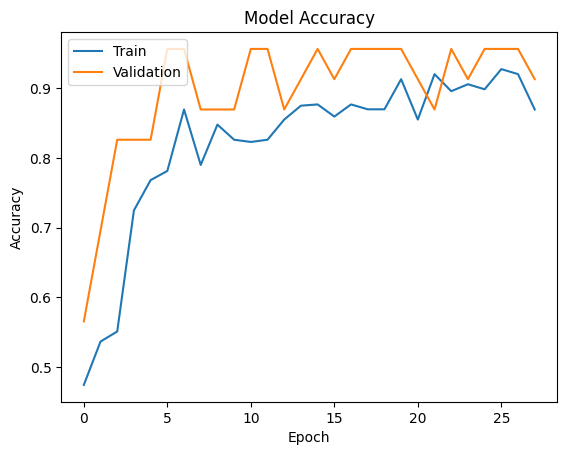

In [34]:
plt.plot(history_vgg16.history['accuracy'])
plt.plot(history_vgg16.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

### Observations
- We can observe that the VGG16 model is generalized with good accuracy

### Accuracy of the VGG16 Model

In [35]:
# Getting the accuracy of the model
accuracy = model.evaluate(X_test_normalized, y_test_enc, verbose=2)

1/1 - 2s - loss: 0.1532 - accuracy: 0.9231 - 2s/epoch - 2s/step


In [36]:
# Here we would get the output as probablities for each category
y_pred=model.predict(X_test_normalized)

1/1 [==============================] - 0s 160ms/step


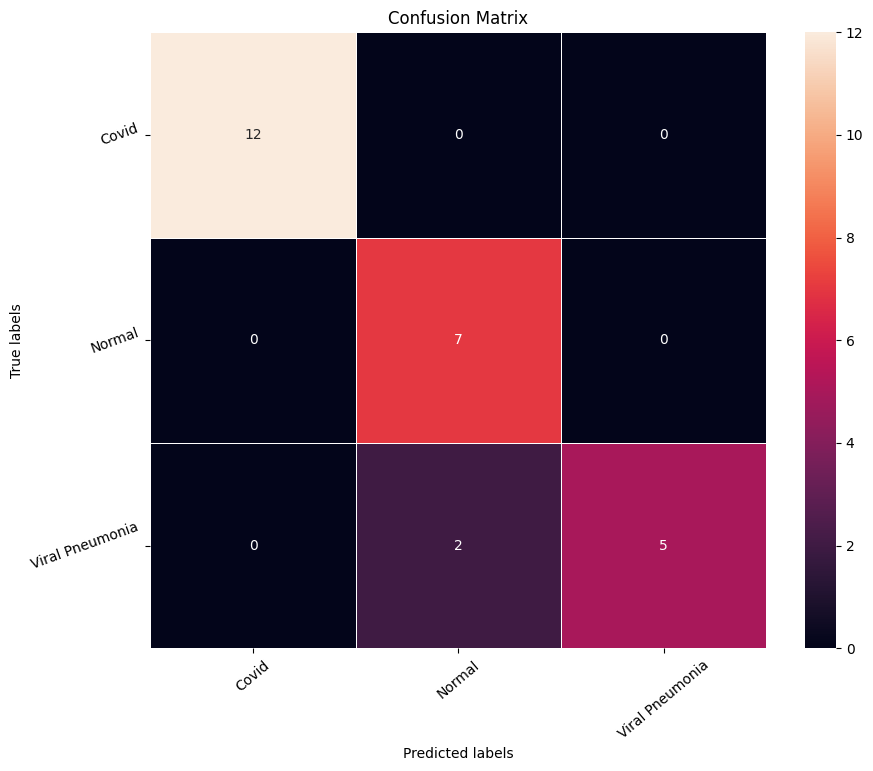

In [37]:
# Obtaining the categorical values from y_test_encoded and y_pred
y_pred_arg=np.argmax(y_pred,axis=1)
y_test_arg=np.argmax(y_test_enc,axis=1)

# Plotting the Confusion Matrix using confusion matrix() function which is also predefined in tensorflow module
confusion_matrix = tf.math.confusion_matrix(y_test_arg,y_pred_arg)
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.4,
    fmt="d",
    square=True,
    ax=ax
)
# Setting the labels to both the axes
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(list(enc.classes_),rotation=40)
ax.yaxis.set_ticklabels(list(enc.classes_),rotation=20)
plt.show()

In [38]:
print(classification_report(y_test_arg,y_pred_arg))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.78      1.00      0.88         7
           2       1.00      0.71      0.83         7

    accuracy                           0.92        26
   macro avg       0.93      0.90      0.90        26
weighted avg       0.94      0.92      0.92        26



### Observations
- According to the confusion matrix and accuracy curve, the VGG16 model does not outperform Model-2. This could be due to the data we're using; since we're using plant seedlings data, there's a chance that these images aren't in the ImageNet dataset, whose weights have been used to build our CNN model.
- Although VGGnet did not outperform Model-2, it is evident that simply employing the transfer learning model without any tuning performed can produce a better outcome than any ordinary CNN.
- Thus we can say that Model-2 is our best model and we can use it model to classify plant seedlings.

# **Happy Training!**